<a href="https://colab.research.google.com/github/JamesKevinStar/ImplementacionesRedesNeuronales/blob/main/Red%20Neuronal%20Hopfield/Tarea_N%C2%B06_Implementaci%C3%B3n_Red_Neuronal_Hopfield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementación de Red Neuronal Hopfield
```
Docente     : Luis Beltran Palma Ttito
Alumnos     : James Kevin Estrella Vilca (182909) - Raísa Melina Peña Luque (182927)
Lugar       : Cusco, Perú, 2022
Universidad : Universidad Nacional de San Antonio Abad del Cusco
```

# 1. Importar Librerías

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import statistics
import random
import pylab

from matplotlib import pylab

%matplotlib inline

# 2. Leer Datos

In [ ]:
data = pd.read_excel("Nuevos_Patrones.xlsx")
data.head()

,Dígito,0,1,2,3,4,5,6,7,8,...,6640,6641,6642,6643,6644,6645,6646,6647,6648,6649
0,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,1,1,1,1,1,1,1
2,2,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,1,1,1,1,1
3,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
test = pd.read_excel("Test_Patrones.xlsx")
test.head()

,Dígito,0,1,2,3,4,5,6,7,8,...,6640,6641,6642,6643,6644,6645,6646,6647,6648,6649
0,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,3,1,1,1,1,1,1,1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
4,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# 3. Separación de Datos

In [ ]:
def Separar_Datos(Data, Categoría):
    X = Data.drop([Categoría],axis=1).values
    Y = Data[Categoría].values
    return X, Y

In [ ]:
X, Y = Separar_Datos(data, "Dígito")

In [ ]:
print(X@X.T)

[[6650 -224 1228 2714 -244 1910 3152  -52 2750 2350]
 [-224 6650 2590 1340  -30 1548  730 2146  388  416]
 [1228 2590 6650 3176  862 1668  874 3622 1728 2288]
 [2714 1340 3176 6650  632 2850 2388 2140 4342 2326]
 [-244  -30  862  632 6650  396  594  674  252   44]
 [1910 1548 1668 2850  396 6650 4340 1284 2382 2998]
 [3152  730  874 2388  594 4340 6650  114 2360 2444]
 [ -52 2146 3622 2140  674 1284  114 6650  544 1000]
 [2750  388 1728 4342  252 2382 2360  544 6650 1326]
 [2350  416 2288 2326   44 2998 2444 1000 1326 6650]]


In [ ]:
X[2], X[4] = X[4], X[2]
print(X)
Y[2], Y[4] = Y[4], Y[2]
print(Y)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[0 1 4 3 2 5 6 7 8 9]


In [ ]:
X_Test, Y_Test = Separar_Datos(test, "Dígito")
print(X_Test)
print(Y_Test)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[0 1 2 3 4 5 6 7 8 9]


# 4. Implementación de la Red Neuronal Hopfield

## A. Función de Activación

In [ ]:
def Función_Activación(X):
    return 1 if X >= 0 else -1

## B. Multiplicar Matrices

In [ ]:
def Multiplicar_Matrices(A, B):
    Filas_A = len(A)
    Columnas_A = len(A[0])
    Filas_B = len(B)
    Columnas_B = len(B[0])
    M = [[0 for i in range(Columnas_B)] for j in range(Filas_A)]
    for i in range(Filas_A):
        for j in range(Columnas_B):
            for k in range(Columnas_A):
                M[i][j] += A[i][k] * B[k][j]
    return M

In [ ]:
l = Multiplicar_Matrices([[-1,1,-1,1,-1,1]],[[0,-1,3,-1,-1,-1],[-1,0,-1,3,-1,3],[3,-1,0,-1,-1,-1],[-1,3,-1,0,-1,3],[-1,-1,-1,-1,0,-1],[-1,3,-1,3,-1,0]])
print(l)

[[-5, 9, -5, 9, -1, 9]]


In [ ]:
B = np.array([[1,-1,-1]])
W = np.array([[2,0,-2],[2,0,-2],[-2,0,2],[-2,0,2]])

In [ ]:
A = np.dot(B,np.transpose(W))
print(A)

[[ 4  4 -4 -4]]


In [ ]:
B = np.array([[-1,-1,1]])
W = np.array([[2,0,-2],[2,0,-2],[-2,0,2],[-2,0,2]])
A = np.dot(B,np.transpose(W))
print(A)

[[-4 -4  4  4]]


In [ ]:
print(np.transpose(W))

[[ 2  2 -2 -2]
 [ 0  0  0  0]
 [-2 -2  2  2]]


In [ ]:
def Multiplicar_Vector_Transpuesta(V):
    Filas = len(V)
    Columnas = len(V)
    R = [[0 for i in range(Columnas)] for j in range(Filas)]
    for i in range(Filas):
        for j in range(Columnas):
            R[i][j] = V[i] * V[j]
    return R

In [ ]:
r = Multiplicar_Vector_Transpuesta([-1,1,-1,1,1,1])
print(r)

[[1, -1, 1, -1, -1, -1], [-1, 1, -1, 1, 1, 1], [1, -1, 1, -1, -1, -1], [-1, 1, -1, 1, 1, 1], [-1, 1, -1, 1, 1, 1], [-1, 1, -1, 1, 1, 1]]


## C. Sumar Matrices

In [ ]:
def Sumar_Matrices(A,B):
    S = [[0 for i in range(len(A))] for j in range(len(A))]
    for i in range(len(A)):
        for j in range(len(A)):
            S[i][j] = A[i][j] + B[i][j]
    return S

## D. Convertir Diagonal a 0

In [ ]:
def Convertir_Matriz_Pesos(M):
    W = [[0 for i in range(len(M))] for j in range(len(M))]
    for i in range(len(M)):
        for j in range(len(M)):
            if i != j:
                W[i][j] = M[i][j]
            else:
                W[i][j] = 0
    return W

## E. Entrenar Red Hopfield

In [ ]:
def Entrenar_Red_Hopfield(X):
    S = [[0 for i in range(len(X[0]))] for j in range(len(X[0]))]
    for i in range(len(X)):
        A = Multiplicar_Vector_Transpuesta(X[i])
        S = Sumar_Matrices(S, A)
    W = Convertir_Matriz_Pesos(S)
    return W

## Mostrar y Reconocer Patrón

In [ ]:
def Reconocer_Patrón(W, X):
    Comparación = X
    M = Multiplicar_Matrices(X,W)
    for i in range(len(M[0])):
        M[0][i] = Función_Activación(M[0][i])
    while True:
        Matriz = np.reshape(M,(95, 70))
        plt.imshow(Matriz)
        plt.show()
        if M == Comparación:
            return M
        else:
            Comparación = M
            M = Multiplicar_Matrices(M,W)
            for i in range(len(M[0])):
                M[0][i] = Función_Activación(M[0][i])

In [ ]:
def Reconocer_Patrón_Sin_Imagen(W, X):
    Comparación = X
    M = Multiplicar_Matrices(X,W)
    for i in range(len(M[0])):
        M[0][i] = Función_Activación(M[0][i])
    while True:
        if M == Comparación:
            return M
        else:
            Comparación = M
            M = Multiplicar_Matrices(M,W)
            for i in range(len(M[0])):
                M[0][i] = Función_Activación(M[0][i])

# 5. Verificar Funcionamiento de los Módulos con el ejemplo de la Diapositiva

In [ ]:
X1 = [[1,-1,1,-1,1,-1,1,-1],[1,1,1,1,-1,-1,-1,-1]]
W1 = Entrenar_Red_Hopfield(X1)
print(W1)

[[0, 0, 2, 0, 0, -2, 0, -2], [0, 0, 0, 2, -2, 0, -2, 0], [2, 0, 0, 0, 0, -2, 0, -2], [0, 2, 0, 0, -2, 0, -2, 0], [0, -2, 0, -2, 0, 0, 2, 0], [-2, 0, -2, 0, 0, 0, 0, 2], [0, -2, 0, -2, 2, 0, 0, 0], [-2, 0, -2, 0, 0, 2, 0, 0]]


In [ ]:
M1 = Reconocer_Patrón_Sin_Imagen(W1,[[-1,1,1,1,-1,-1,-1,-1]])
print(M1)

[[1, 1, 1, 1, -1, -1, -1, -1]]


# 6. Entrenamiento de la Red Neuronal Hopfield con solo 3 Patrones del Dataset

## A. Entrenar Red Hopfield

In [ ]:
W = Entrenar_Red_Hopfield(X[0:3])
print(W[0])

[0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -3, -3, -3, -3, -3, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -3, -3, -3, -3, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -3, -3, -3, -3, -3, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -3, -3, -3, -3, -3, -3, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,

## B. Reconocer el Patrón


 DÍGITO A PREDECIR: 0


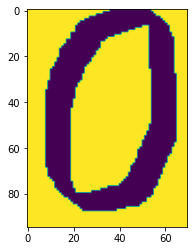

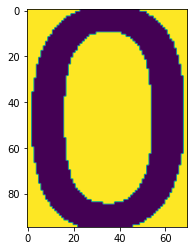

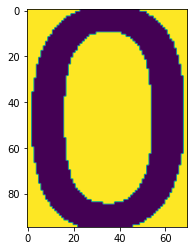


 DÍGITO A PREDECIR: 1


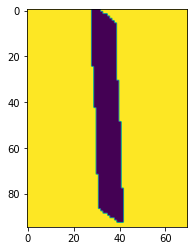

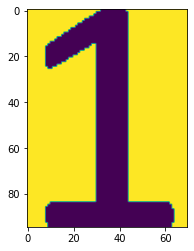

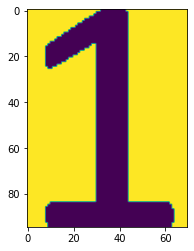


 DÍGITO A PREDECIR: 2


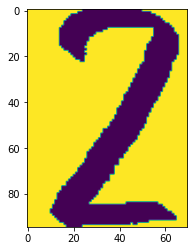

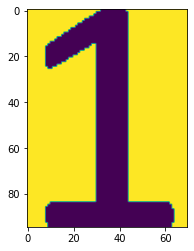

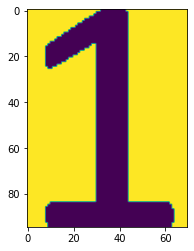


 DÍGITO A PREDECIR: 3


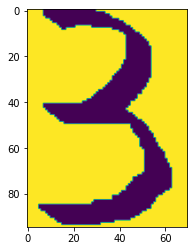

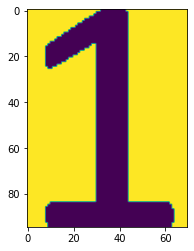

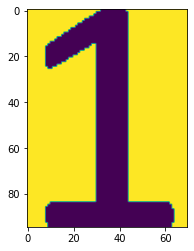


 DÍGITO A PREDECIR: 4


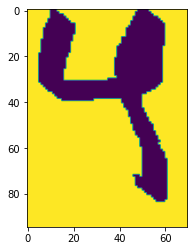

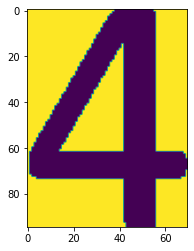

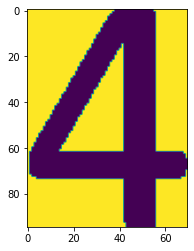


 DÍGITO A PREDECIR: 5


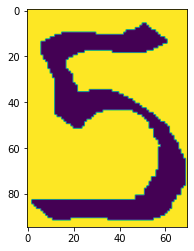

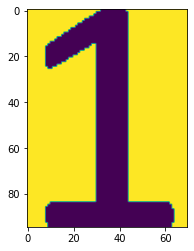

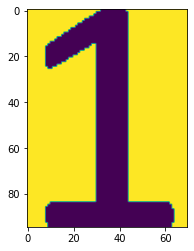


 DÍGITO A PREDECIR: 6


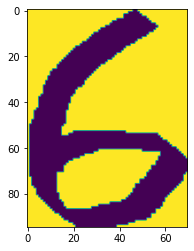

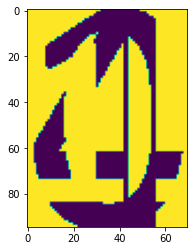

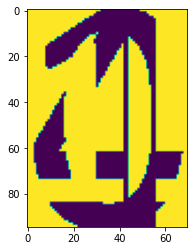


 DÍGITO A PREDECIR: 7


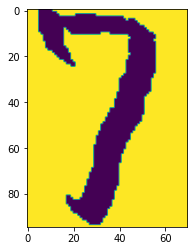

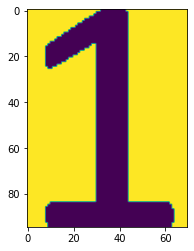

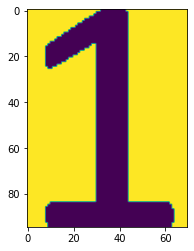


 DÍGITO A PREDECIR: 8


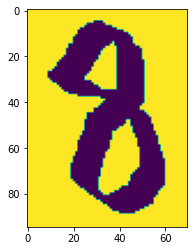

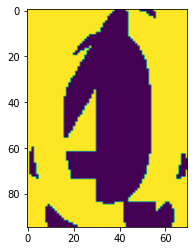

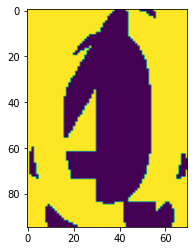


 DÍGITO A PREDECIR: 9


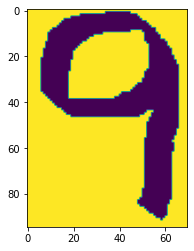

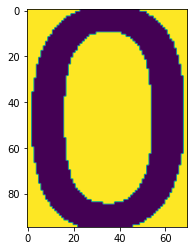

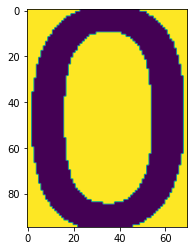

In [ ]:
for t in range(len(X_Test)):
    print("\n DÍGITO A PREDECIR: {}".format(Y_Test[t]))
    Matriz = np.reshape(X_Test[t].tolist(),(95, 70))
    plt.imshow(Matriz)
    plt.show()
    print("=========================")
    M = Reconocer_Patrón(W,[X_Test[t].tolist()])

# 7. Entrenamiento de la Red Neuronal Hopfield con todos los Patrones del Dataset

## A. Entrenar la Red Hopfield

In [ ]:
WT = Entrenar_Red_Hopfield(X)
print(WT[0])

[0, 10, 10, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 2, -2, -2, -2, -4, -4, -4, -4, -4, -6, -6, -6, -6, -6, -6, -10, -10, -10, -10, -10, -8, -8, -6, -6, -6, -6, -4, -4, 0, 2, 2, 2, 6, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 0, -2, -2, -4, -4, -4, -4, -4, -4, -6, -6, -6, -6, -6, -6, -6, -10, -10, -10, -10, -10, -10, -10, -8, -8, -8, -6, -6, -6, -6, -6, -4, -4, 0, 2, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 0, -2, -2, -4, -4, -4, -4, -4, -4, -4, -6, -6, -6, -6, -6, -6, -6, -10, -10, -10, -10, -10, -10, -10, -10, -8, -8, -8, -8, -8, -6, -6, -6, -6, -4, -4, -2, 6, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 0, -2, -4, -4, -4, -4, -4, -4, -4, -4, -6, -6, -6, -6, -6, -6, -6, -6, -10, -10, -10, -10, -10, -10, -10, -10, -10, -8, -8, -8, -8, -8, -8, -6, -6, -6, -6, -6, -4, 2, 8, 8, 8, 

## B. Reconocer el Patrón


 DÍGITO A PREDECIR: 0


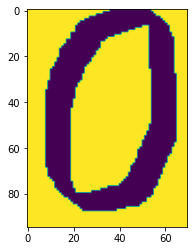

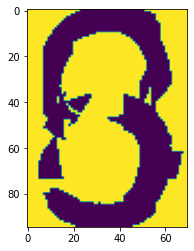

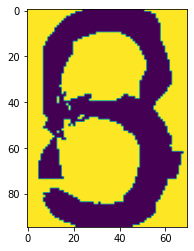

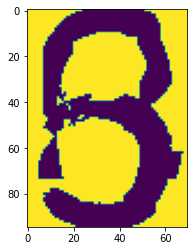

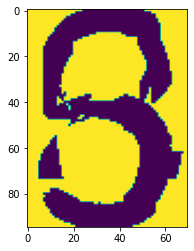

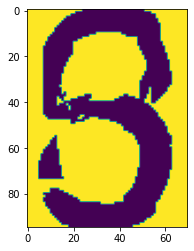

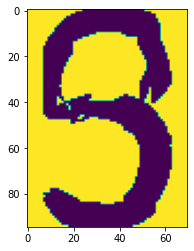

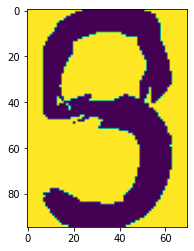

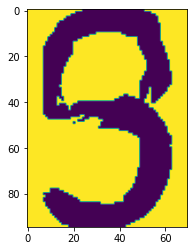

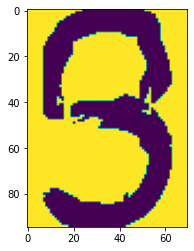

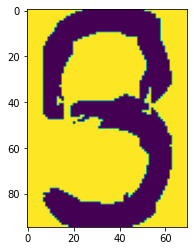

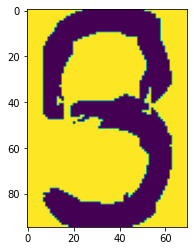


 DÍGITO A PREDECIR: 1


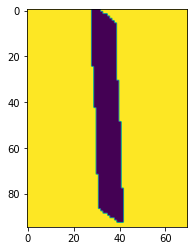

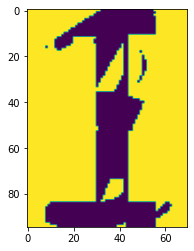

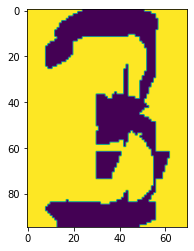

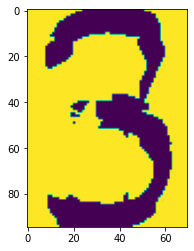

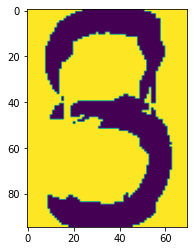

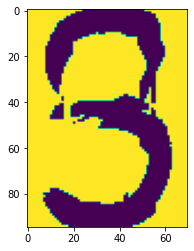

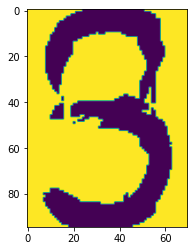

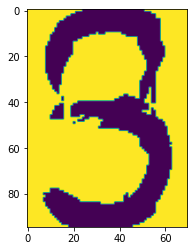

In [ ]:
i = 0
while i < 2:
    print("\n DÍGITO A PREDECIR: {}".format(Y_Test[i]))
    Matriz = np.reshape(X_Test[i].tolist(),(95, 70))
    plt.imshow(Matriz)
    plt.show()
    print("=========================")
    M = Reconocer_Patrón(WT,[X_Test[i].tolist()])
    i += 1